In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import sys
sys.path.append('../')
import utils
import settings

In [2]:
keys = utils.get_most_important_keys()
days = utils.get_days_to_predict(diff_path='../')
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = utils.read_files(diff_path='../')

In [28]:
keys

['date_forecast',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad:W']

In [27]:
train_a.describe(), X_train_estimated_a.describe(), X_train_observed_a.describe(), X_test_estimated_a.describe()

(                             time  pv_measurement
 count                       34085    34085.000000
 mean   2021-05-14 00:29:51.497726      630.594707
 min           2019-06-02 22:00:00        0.000000
 25%           2020-05-22 23:00:00        0.000000
 50%           2021-05-13 00:00:00        5.940000
 75%           2022-05-03 01:00:00      678.040000
 max           2023-04-30 23:00:00     5733.420000
 std                           NaN     1165.902422,
                         date_calc               date_forecast  \
 count                       17576                       17576   
 mean   2023-01-27 19:07:13.160673  2023-01-28 23:11:50.127446   
 min           2022-10-27 07:00:18         2022-10-28 22:00:00   
 25%           2022-12-12 08:00:05         2022-12-13 16:26:15   
 50%           2023-01-28 08:00:04         2023-01-29 10:52:30   
 75%           2023-03-15 08:00:04         2023-03-16 05:18:45   
 max           2023-04-29 07:00:05         2023-04-30 23:45:00   
 std        

In [60]:
def normalize_df(df, keys, time_column):
    df_normalized = df.copy()
    columns_to_drop = [ c for c in df_normalized.columns if (c not in keys) and (c != time_column)]
    df_normalized = df_normalized.drop(columns=columns_to_drop)
    for key in keys:
        df_normalized[key] = (df[key] - df[key].mean()) / df[key].std()
    return df_normalized

In [36]:
def get_mean_and_std(df, keys):
    keys.remove('date_forecast') if 'date_forecast' in keys else keys.remove('time') if 'time' in keys else None
    return { k:{ 'mean': df[k].mean(), 'std': df[k].std(), 'min': df[k].min(), 'max': df[k].max() } for k in keys } 

In [33]:
y_a = normalize_df(train_a, ['pv_measurement'], ['time'])
y_a

,time,pv_measurement
0,2019-06-02 22:00:00,-0.540864
1,2019-06-02 23:00:00,-0.540864
2,2019-06-03 00:00:00,-0.540864
3,2019-06-03 01:00:00,-0.540864
4,2019-06-03 02:00:00,18.819136
...,...,...
34080,2023-04-30 19:00:00,8.479136
34081,2023-04-30 20:00:00,-0.540864
34082,2023-04-30 21:00:00,-0.540864
34083,2023-04-30 22:00:00,-0.540864


In [68]:
def plot_normal_distribution(df, mean, std):
    plt.hist(df, bins=30, density=True, alpha=0.6, color='b')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = (1.0 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
    plt.plot(x, pdf, 'k')

In [61]:
keys.remove('date_forecast') if 'date_forecast' in keys else None
X_tr_est_a = normalize_df(X_train_estimated_a, keys, 'date_forecast')
X_tr_obs_a = normalize_df(X_train_observed_a, keys, 'date_forecast')
X_te_est_a = normalize_df(X_test_estimated_a, keys, 'date_forecast')

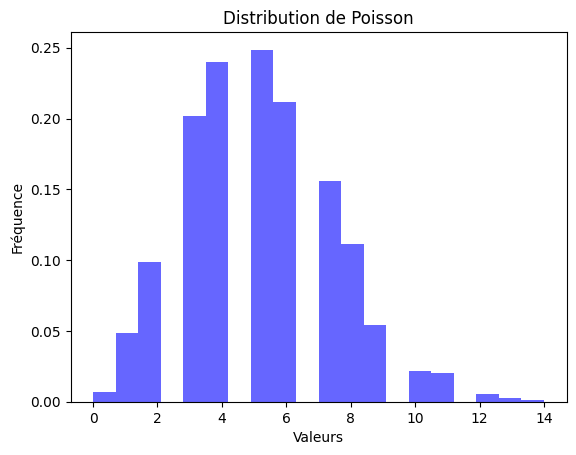

In [77]:
moyenne_poisson = 5.0

# Générez un échantillon de données suivant une distribution de Poisson
taille_de_l_echantillon = 1000
donnees_poisson = np.random.poisson(moyenne_poisson, taille_de_l_echantillon)

# Créez un histogramme pour visualiser la distribution de Poisson
plt.hist(donnees_poisson, bins=20, density=True, alpha=0.6, color='b')

plt.title("Distribution de Poisson")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")

plt.show()

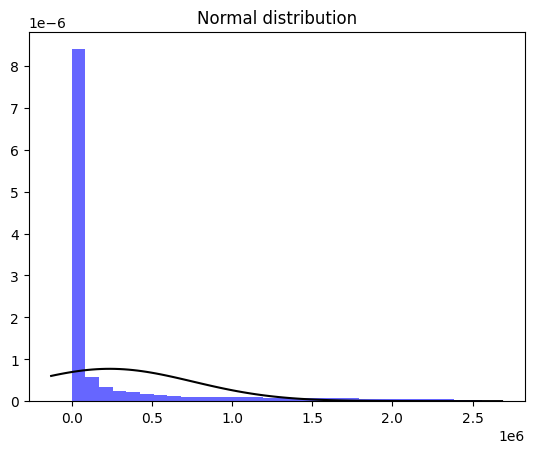

In [67]:
plot_normal_distribution(X_train_estimated_a[keys[0]], X_train_estimated_a[keys[0]].mean(), X_train_estimated_a[keys[0]].std())

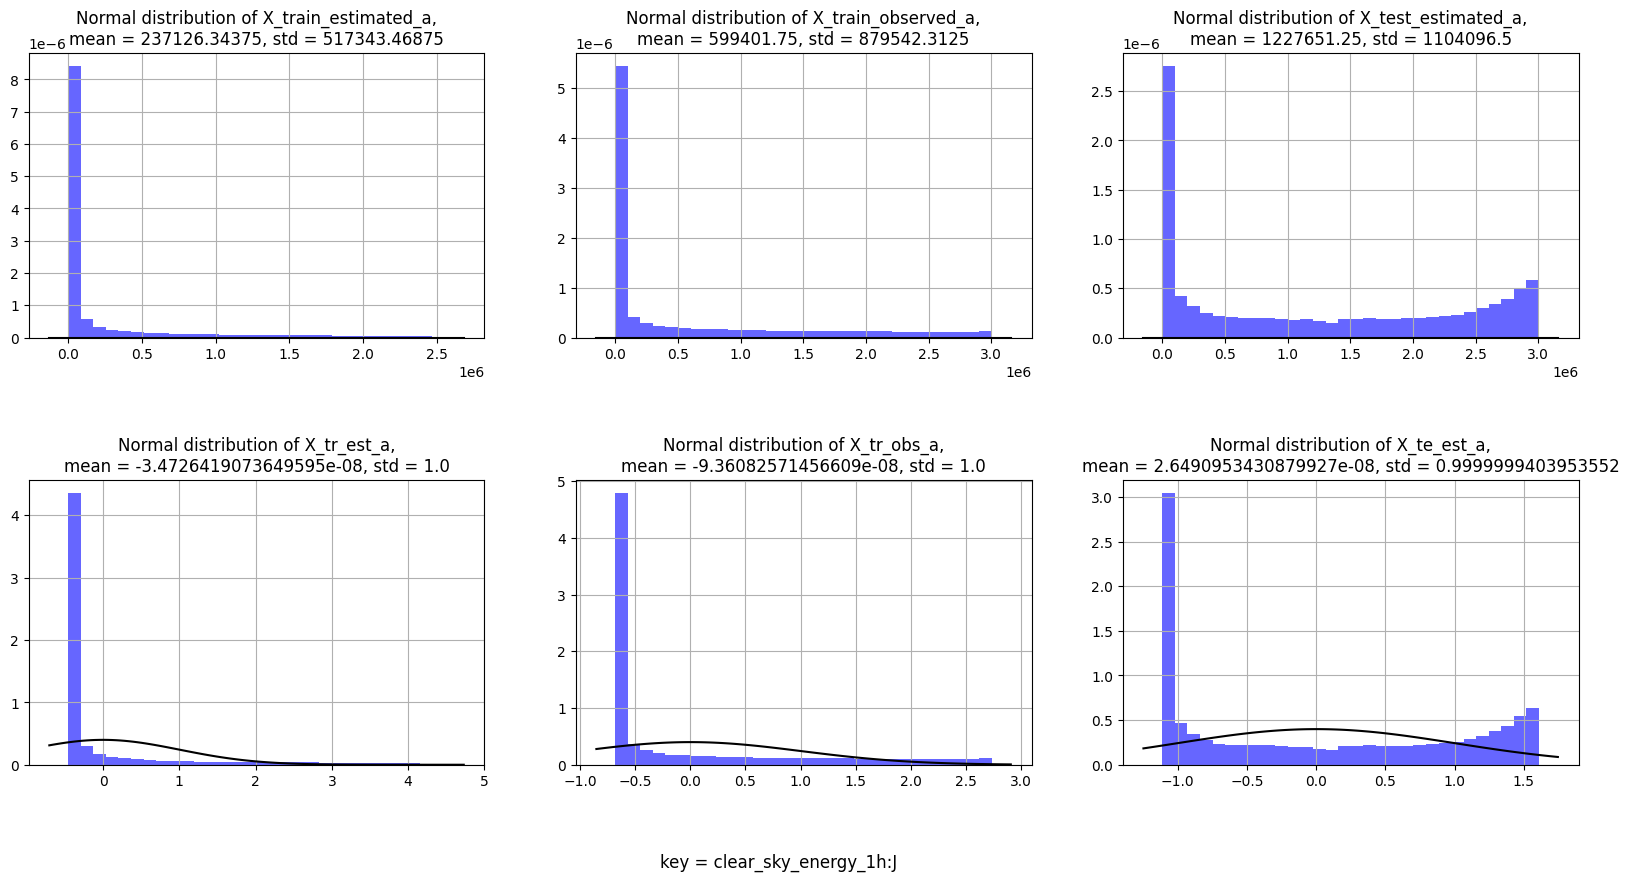

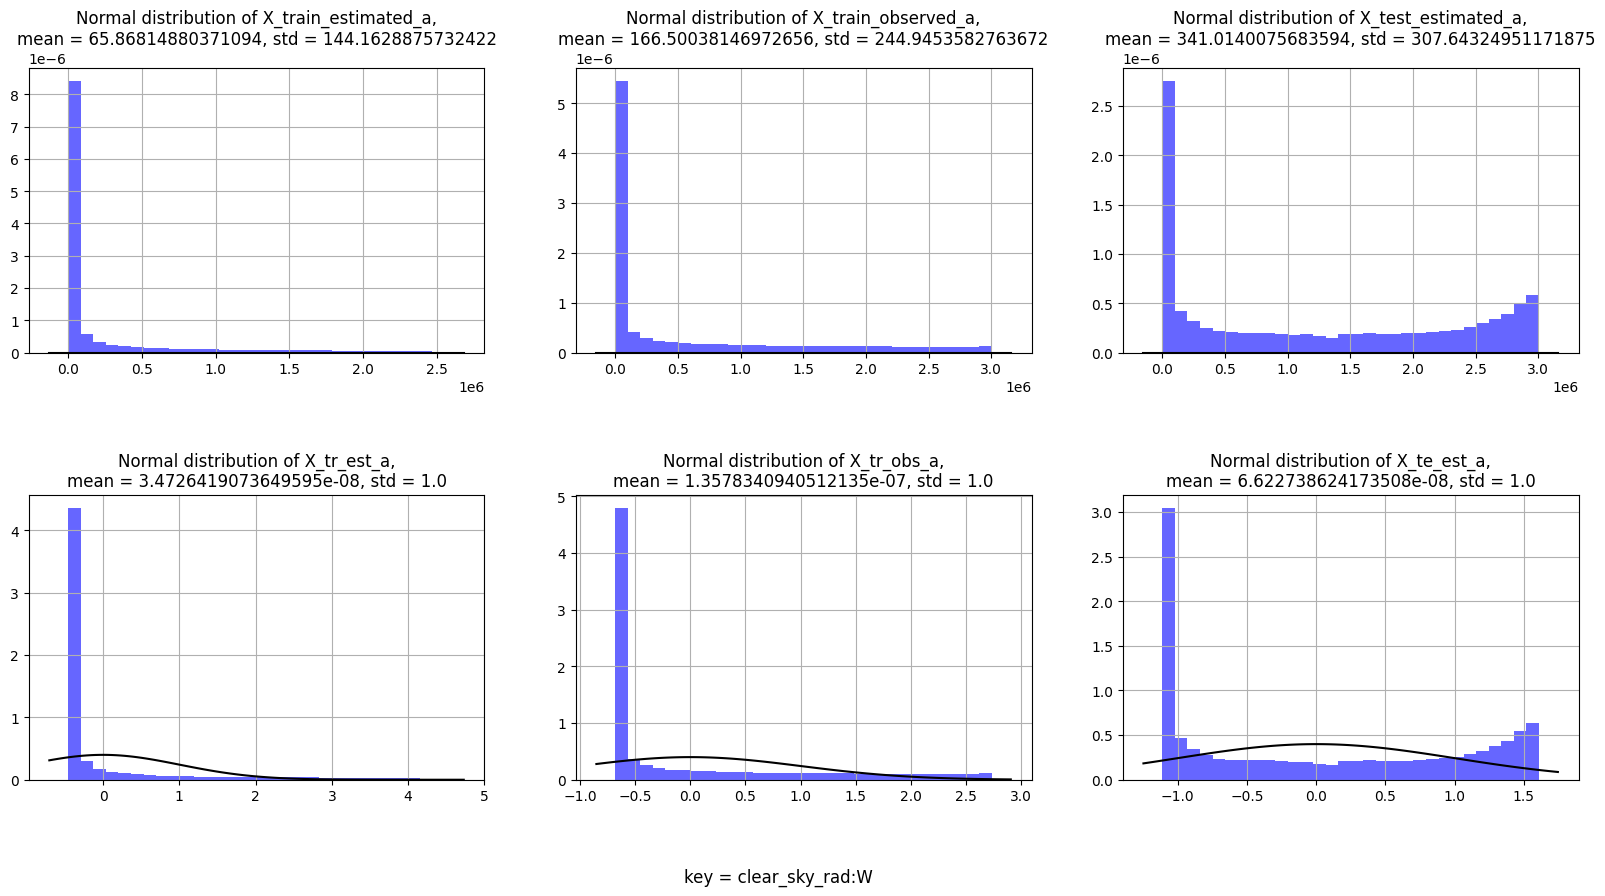

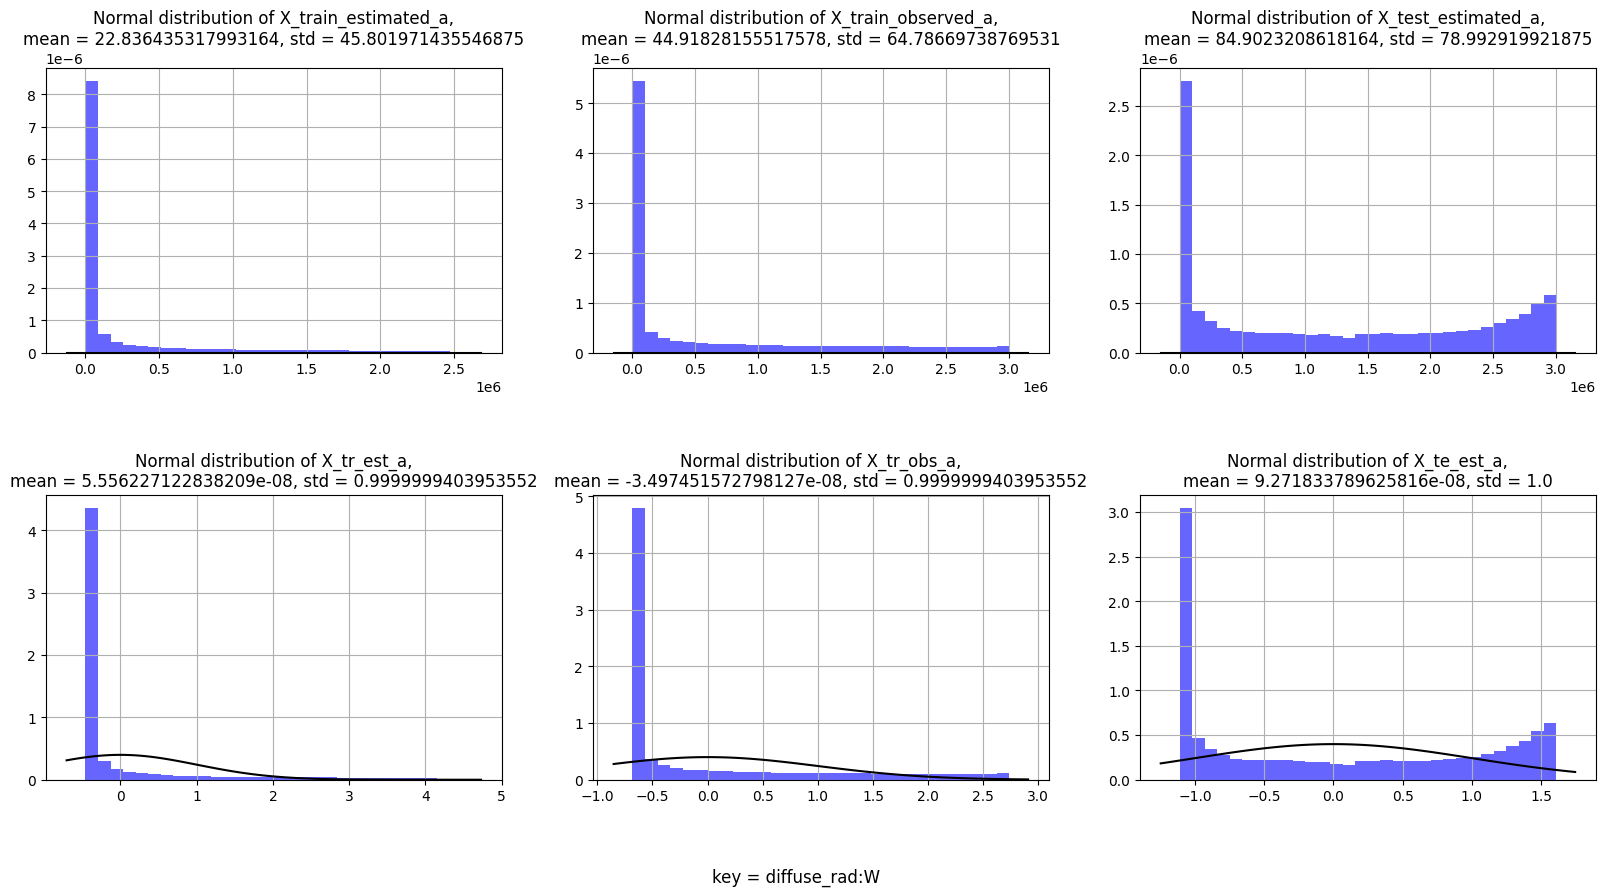

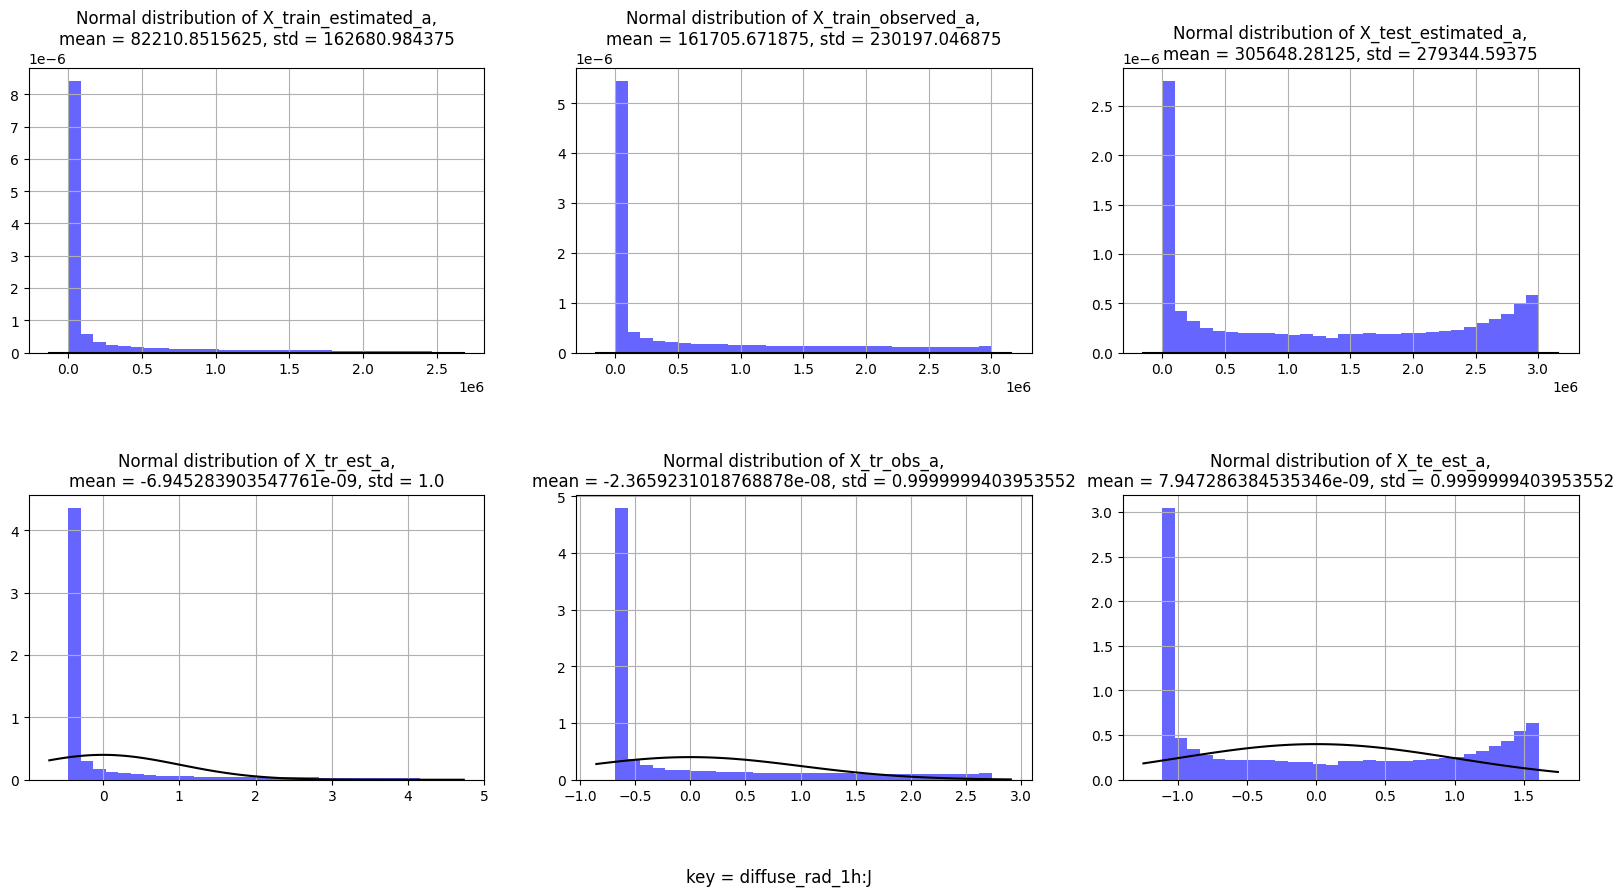

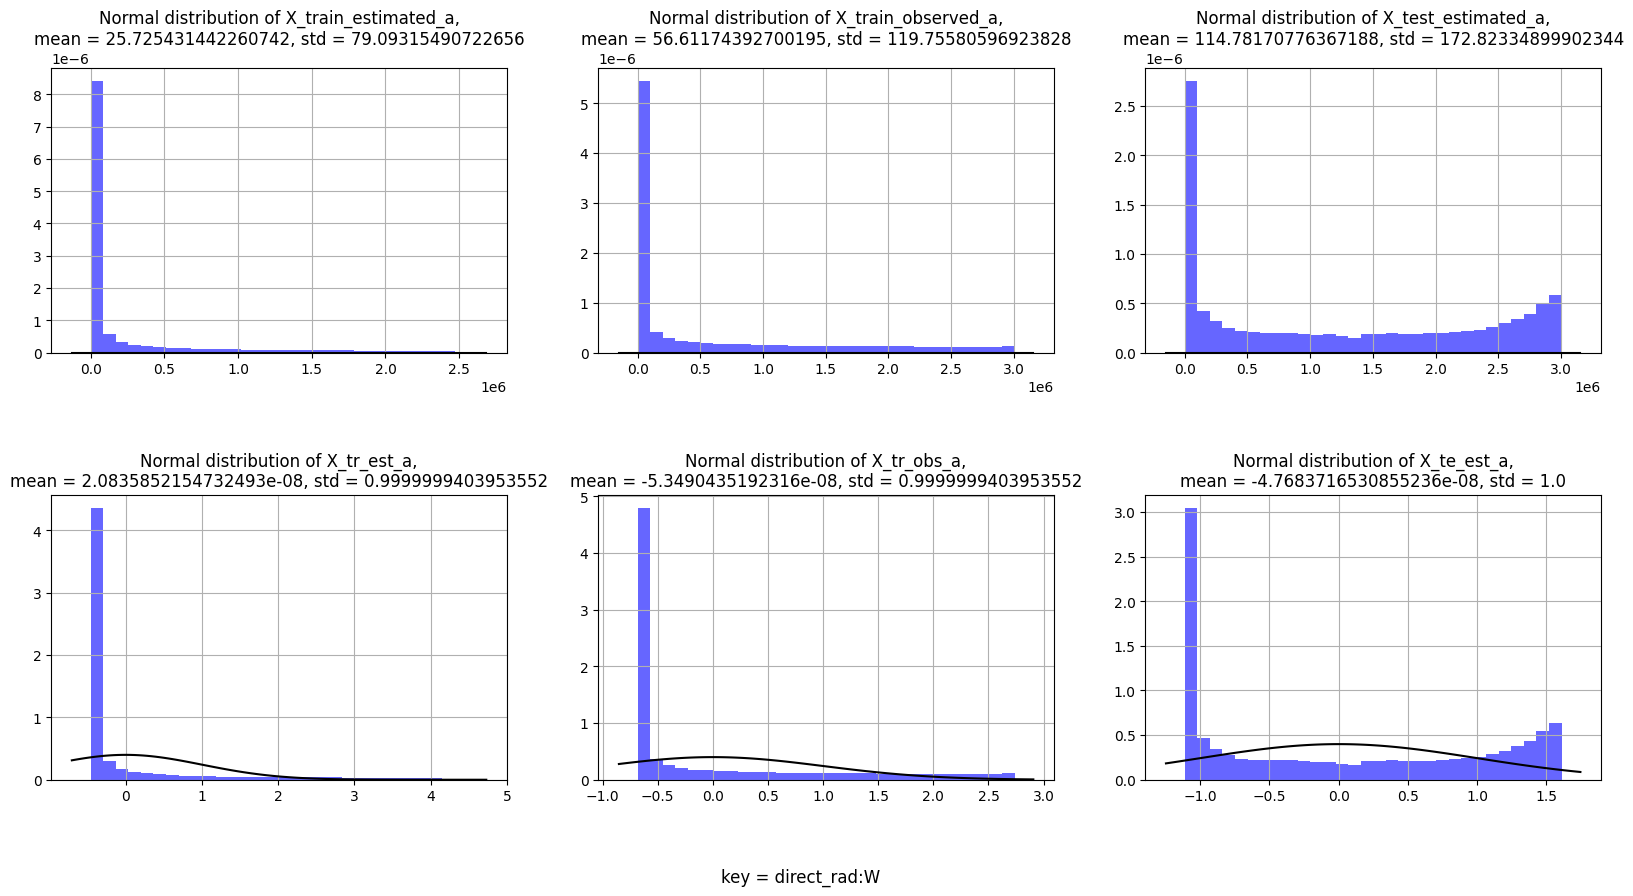

In [76]:
list_to_plot = [X_train_estimated_a, X_train_observed_a, X_test_estimated_a, X_tr_est_a, X_tr_obs_a, X_te_est_a]
plot_titles = ['X_train_estimated_a', 'X_train_observed_a', 'X_test_estimated_a', 'X_tr_est_a', 'X_tr_obs_a', 'X_te_est_a']

for key in keys:
    
    plt.figure(figsize=(20, 8))
    for k in range(6):
        plt.subplot(2, 3, k + 1)
        plot_normal_distribution(list_to_plot[k][keys[0]], 0, 1)
        plt.title(f"Normal distribution of {plot_titles[k]},\nmean = {list_to_plot[k][key].mean()}, std = {list_to_plot[k][key].std()}")
        plt.grid()
    

    plt.subplots_adjust(top=1., hspace=0.5)
    plt.suptitle(f'key = {key}', y=0)
    plt.show()

In [38]:
get_mean_and_std(X_train_estimated_a, keys), get_mean_and_std(X_train_observed_a, keys), get_mean_and_std(X_test_estimated_a, keys)

({'clear_sky_energy_1h:J': {'mean': 237126.34,
   'std': 517343.47,
   'min': 0.0,
   'max': 2555980.0},
  'clear_sky_rad:W': {'mean': 65.86815,
   'std': 144.16289,
   'min': 0.0,
   'max': 711.6},
  'diffuse_rad:W': {'mean': 22.836435,
   'std': 45.80197,
   'min': 0.0,
   'max': 300.5},
  'diffuse_rad_1h:J': {'mean': 82210.85,
   'std': 162680.98,
   'min': 0.0,
   'max': 1061123.2},
  'direct_rad:W': {'mean': 25.725431,
   'std': 79.093155,
   'min': 0.0,
   'max': 530.4}},
 {'clear_sky_energy_1h:J': {'mean': 599401.75,
   'std': 879542.3,
   'min': 0.0,
   'max': 3005720.2},
  'clear_sky_rad:W': {'mean': 166.50038,
   'std': 244.94536,
   'min': 0.0,
   'max': 836.4},
  'diffuse_rad:W': {'mean': 44.91828,
   'std': 64.7867,
   'min': 0.0,
   'max': 345.7},
  'diffuse_rad_1h:J': {'mean': 161705.67,
   'std': 230197.05,
   'min': 0.0,
   'max': 1205498.4},
  'direct_rad:W': {'mean': 56.611744,
   'std': 119.755806,
   'min': 0.0,
   'max': 688.7}},
 {'clear_sky_energy_1h:J': {'mean'

In [13]:
data2023 = X_test_estimated_a[(X_test_estimated_a["date_forecast"] >= "2023-05-01") & (X_test_estimated_a["date_forecast"] < "2023-05-02")]["clear_sky_rad:W"]
data2022 = X_train_observed_a[(X_train_observed_a["date_forecast"] >= "2022-05-01") & (X_train_observed_a["date_forecast"] < "2022-05-02")]["clear_sky_rad:W"]
data2021 = X_train_observed_a[(X_train_observed_a["date_forecast"] >= "2021-05-01") & (X_train_observed_a["date_forecast"] < "2021-05-02")]["clear_sky_rad:W"]

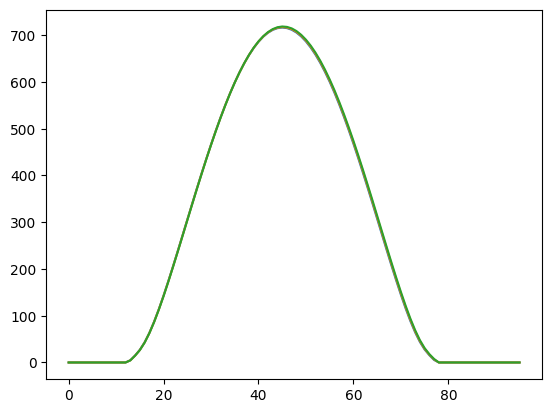

In [20]:
plt.plot(np.array(data2023))
plt.plot(np.array(data2022))
plt.plot(np.array(data2021))

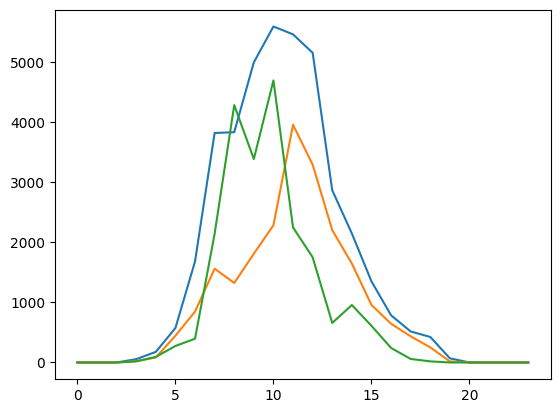

In [26]:
plt.plot(np.array(train_a[(train_a["time"] >= "2021-05-01") & (train_a["time"] < "2021-05-02")]['pv_measurement']))
plt.plot(np.array(train_a[(train_a["time"] >= "2022-05-01") & (train_a["time"] < "2022-05-02")]['pv_measurement']))
plt.plot(np.array(train_a[(train_a["time"] >= "2020-05-01") & (train_a["time"] < "2020-05-02")]['pv_measurement']))
plt.plot(np.array(train_a[(train_a["time"] >= "2019-05-01") & (train_a["time"] < "2019-05-02")]['pv_measurement']))